# Scripts
We have now come to a point where our commands cover multiple lines are are therefore sometimes hard to write and read. Correcting typos or making changes also becomes uncomfortable. Instead of typing everything into the terminal, we will now write **scripts**. A script is a text file that contains shell commands. The shell can then be instructed to execute all commands in the script:

```console
source <script>
```

It is good practise, to append the filename extension ".sh" to the script.

Another option (on bash) is to run a script as
```console
. <script>
```





## A first script
Change into the *~/Courses/unix_and_commandline/src/* directory on wallace.

This is where we will develop our first script. To write the commands into the file, we need an editor.

Run 
```console
nano hello_world.sh
```

Your terminal will become a editor:

![image.png](../img/a0a7dd41-069f-479b-9695-61d393cc1b40.png)
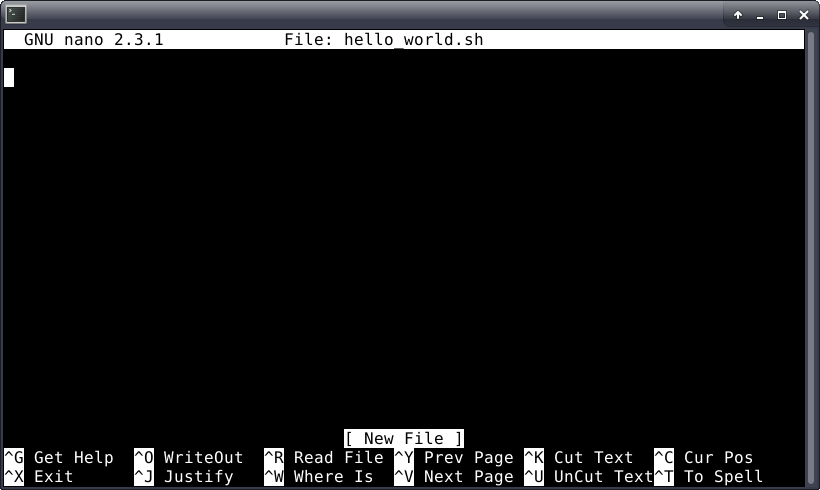

You  can now start typing into the editor as you would e.g. in MS Word.

Write the following short script:

![image.png](../img/03a9f9aa-9af5-4801-acd6-13ddde678c73.png)
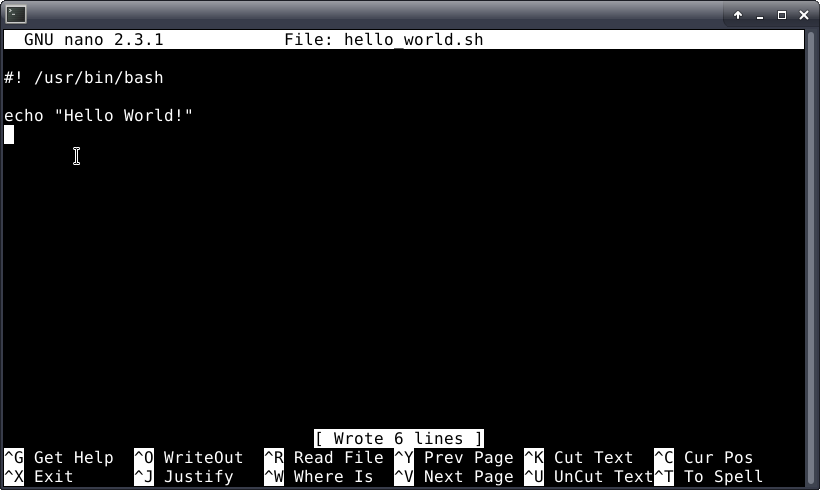

Now save your work by typing `[Ctrl]`+`[o]` (`[Cmd]` + `[o]` on Mac)

To exit the editor, type `[Ctrl]` + `[x]` (`[Cmd]` + `[x]` on Mac)

Now execute the script with
```console
$> bash hello_world.sh
Hello World!
```

### Explanation:
The very first line starts with `#!`, the *shebang*. The shebang notifies the interpreter (the shell) that the following in to be interpreted by the program */usr/bin/bash*. The rest of the file consists of *bash* commands. A line starting with `#` is a comment and will not be interpreted. The shebang line makes sure that the script can also be run without explicitely calling the interpreter as we do here.

## Command line arguments
We now have a nice little tool to inspect a gff file. It should work for any gff file, not just for this particular one. Instead of editing the script each time we
want to run another gff, it would be great if we could pass the gff filename to the script as an argument:
```console
$> bash gffinspect.sh <gff filename>
```

In a script, the numeric variables `$0`, `$1`, etc denote the *n*th command line argument following the script filename. Note that `$0` is the script itself.

## Exercises
### Scripting
1. Write a script that greets the user with "Hello \<username\>, you are logged into \<hostname\>".
1. Write a script that
    * Lists the directory content
    * Writes the hostname
    * Writes the username
    * Writes the date and time (`date`)
1. Write a script that reads in the SARS-CoV2 annotation file and
    1. Infers the number of lines
    1. Infers the feature type
    1. Prints a list of features and their frequency in the file

#### Solutions
1.   
![image.png](../img/4f2edad2-88df-4b55-b0b5-9898566b1a78.png)

3.
```shell
#! /bin/bash

GFF="../data/GCF_009858895.2_ASM985889v3_genomic.gff"

# Get unique feature types.
unique_features=$(cat $GFF | grep -v "^#" | awk -F" " '{print $3}' | sort -u)

# Print the header line
echo "#Feature type,count"

# Loop over all features and count their frequency.

for feat in $unique_features; do
    freq=$(grep -c "\s$feat\s" $GFF)
    echo "$feat,$freq"
done
```

### Command line argument
Modify the script such that the gff filename is taken from the 1st commandline argument.

#### Solution
```shell
#! /bin/bash

GFF=$1

# Get unique feature types.
unique_features=$(cat $GFF | grep -v "^#" | awk -F" " '{print $3}' | sort -u)

# Print the header line
echo "#Feature type,count"

# Loop over all features and count their frequency.

for feat in $unique_features; do
    freq=$(grep -c "\s$feat\s" $GFF)
    echo "$feat,$freq"
done
```

### Multiple arguments and case checking
Modify the script and add a second (optional) command line argument, a feature type. If given, count and report only those features. **Hint**: `$#` is the number of command line arguments **exclusive** of $0.

#### Solution
```shell
#! /bin/bash

GFF=$1
if [ $# -eq 2 ]; then
    query=$2
else
    query="all"
fi


# Get unique feature types.
if [ $query == "all" ]; then
    unique_features=$(cat $GFF | grep -v "^#" | awk -F" " '{print $3}' | sort -u)
else
    unique_features=$query
fi


# Print the header line
echo "#Feature type,count"

# Loop over all features and count their frequency.

for feat in $unique_features; do
    freq=$(grep -c "\s$feat\s" $GFF)
    echo "$feat,$freq"
done
```


### Usage instruction on faulty input
Modify the script such that a message about correct usage appears if the number of arguments is wrong (i.e. no argument or more than 2).

#### Solution
```shell
#! /bin/bash

GFF=$1
if [ $# -eq 2 ]; then
    query=$2
elif [ $# -eq 1 ]; then
    query="all"
else
    echo "Wrong number of arguments. Usage: gffinspec.sh GFF [feature_type]."
    exit 1
fi


# Get unique feature types.
if [ $query == "all" ]; then
    unique_features=$(cat $GFF | grep -v "^#" | awk -F" " '{print $3}' | sort -u)
else
    unique_features=$query
fi


# Print the header line
echo "#Feature type,count"

# Loop over all features and count their frequency.

for feat in $unique_features; do
    freq=$(grep -c "\s$feat\s" $GFF)
    echo "$feat,$freq"
done
```